In [944]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [945]:
vase1 = pd.read_csv('~/Desktop/Archive/vase1.csv')

In [946]:
vase1.head()

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False
1,2020,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False
2,2020,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False
3,2020,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False
4,2020,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False


In [947]:
vase1.shape

(4409, 12)

<AxesSubplot:>

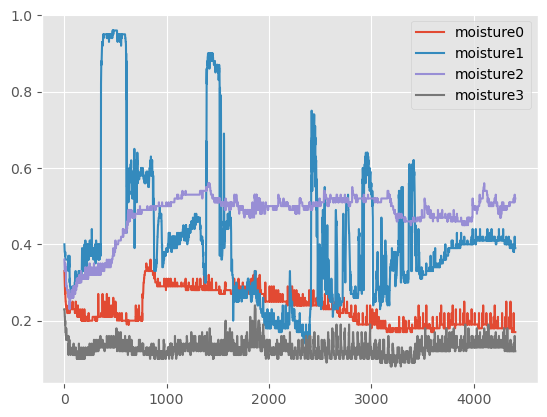

In [948]:
vase1[['moisture0', 'moisture1','moisture2', 'moisture3']].plot()

In [949]:
X = vase1.iloc[:,6:10].values
y = vase1.iloc[:,-2].values

In [950]:
vase2= pd.read_csv('~/Desktop/Archive/vase2.csv')

In [951]:
vase2.shape

(10289, 12)

In [952]:
vase2.head()

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,11,14,44,39,0.59,0.63,0.51,0.45,0.01,False
1,2020,3,11,14,47,9,0.56,0.60,0.52,0.48,0.01,False
2,2020,3,11,14,49,39,0.56,0.54,0.54,0.51,0.01,False
3,2020,3,11,14,52,9,0.56,0.50,0.57,0.51,0.01,False
4,2020,3,11,14,54,39,0.57,0.53,0.58,0.51,0.01,False


<AxesSubplot:>

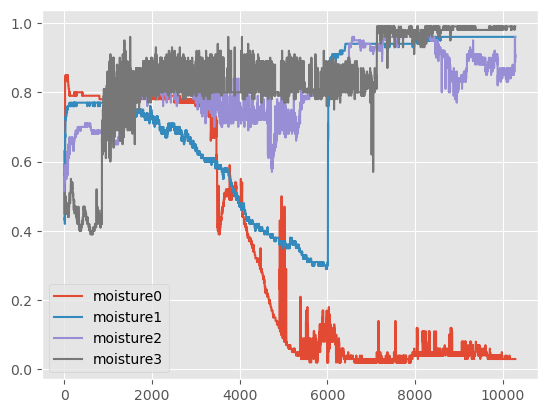

In [953]:
vase2[['moisture0', 'moisture1','moisture2', 'moisture3']].plot()

In [954]:
X2 = vase2.iloc[0:882,6:10].values
y2 = vase2.iloc[0:882,-2].values

In [955]:
print ("1. Random Forest Regression ")

1. Random Forest Regression 


In [956]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 0)

In [957]:
regressor1 = RandomForestRegressor(n_estimators=100, random_state=0)

In [958]:
regressor1.fit(X_train, y_train)
pred_y = regressor1.predict(X_test)

In [977]:
for i in range (10):
    print("Actual : " , y_test[i],"\t", "Predicted : ", pred_y[i])

Actual :  0.02 	 Predicted :  0.020278730158730166
Actual :  0.04 	 Predicted :  0.04009999999999998
Actual :  0.02 	 Predicted :  0.026499999999999996
Actual :  0.03 	 Predicted :  0.030012131630015638
Actual :  0.02 	 Predicted :  0.024459761904761904
Actual :  0.03 	 Predicted :  0.029999999999999947
Actual :  0.03 	 Predicted :  0.029999999999999947
Actual :  0.02 	 Predicted :  0.015866666666666675
Actual :  0.02 	 Predicted :  0.021153846153846162
Actual :  0.03 	 Predicted :  0.030171098760052386


In [960]:
from sklearn import metrics
print('Mean Absolute Error : ', mean_absolute_error(pred_y, y2))

Mean Absolute Error :  0.021004783293431945


In [961]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Training Accuracy : ',regressor1.score(X_train, y_train))

Training Accuracy :  0.9543140243865802


In [962]:
print ("2. Linear Regression ")

2. Linear Regression 


In [963]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

LinearRegression()

In [979]:
pred_Y = regressor2.predict(X_test)
y2 = vase2.iloc[0:882,-2].values
for i in range (10):
    print("Actual : " , y_test[i],"\t", "Predicted : ", pred_Y[i])

Actual :  0.02 	 Predicted :  0.018282589802947977
Actual :  0.04 	 Predicted :  0.038685303264474905
Actual :  0.02 	 Predicted :  0.022212977226018563
Actual :  0.03 	 Predicted :  0.029160749197457092
Actual :  0.02 	 Predicted :  0.026303807554211446
Actual :  0.03 	 Predicted :  0.02595002527346313
Actual :  0.03 	 Predicted :  0.02779805263892316
Actual :  0.02 	 Predicted :  0.018782996156052494
Actual :  0.02 	 Predicted :  0.025047541289853016
Actual :  0.03 	 Predicted :  0.0277404817091432


In [980]:
print('Mean Absolute Error : ', mean_absolute_error( y2, pred_Y))

Mean Absolute Error :  0.021158904998239726


In [981]:
X2 = vase2.iloc[0:2058,6:10].values
print('Training Accuracy : ',regressor2.score(X_train, y_train))

Training Accuracy :  0.36945123716579775


In [982]:
print(" 3. Lasso Regression " )

 3. Lasso Regression 


In [983]:
regression3 = Lasso(alpha=0.5)
regression3.fit(X_train, y_train)
y2=vase2.iloc[0:882,-2].values

In [984]:
predict_Y = regression3.predict(X_test)

In [970]:
cv_score = cross_val_score(regression3, X_train, y_train, cv=10)
print(f"CV Score --> {np.mean(cv_score)}")
rmse = mean_squared_error(y2, predict_Y, squared=False)
print(f"RMSE --> {rmse}")

CV Score --> -0.003331682312758133
RMSE --> 0.021530780900378937


In [985]:
print('Mean Absolute Error : ', mean_absolute_error(predict_Y, y2))

Mean Absolute Error :  0.020942772534777075


In [986]:
X2=vase2.iloc[0:2058,6:10].values
print('Training Accuracy : ',regression3.score(X_train, y_train))

Training Accuracy :  0.0


In [987]:
print(" 4. Xgboost Regression ")

 4. Xgboost Regression 


In [988]:
import seaborn as sns
plt.style.use("ggplot")
import os
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [989]:
from sklearn.metrics import mean_absolute_error
predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.0018433920745135975


In [990]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [991]:
print('Training Accuracy : ',my_model.score(X_train, y_train))

Training Accuracy :  0.9306574663951472
